<a href="https://colab.research.google.com/github/oswaldopaulo/projeto1_dio_carrefour_python/blob/main/precos_combustiveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#importando pandas e carregando as planilhas
import pandas as pd
xls1 = pd.read_excel('/content/drive/MyDrive/datasets/preco-gasolina-mensal-2001-2012.xlsx',header=12)
xls2 = pd.read_excel('/content/drive/MyDrive/datasets/preco-gasolina-mensal-2013-2019.xlsx',header=15)
xls2.columns = xls1.columns

df = pd.concat([xls1, xls2])







In [78]:
df.head()

,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2001-07-01,ETANOL HIDRATADO,CENTRO OESTE,1461,R$/l,1.0885,0.10834,0.807,1.490,0.2823,0.0995315,0.8062,0.09879,0.4408,1.1,0.123
1,2001-07-01,ETANOL HIDRATADO,NORDESTE,3442,R$/l,1.1212,0.10078,0.790,1.580,0.1735,0.0898858,0.9477,0.09202,0.4339,1.2284,0.097
2,2001-07-01,ETANOL HIDRATADO,NORTE,935,R$/l,1.2626,0.08097,0.881,1.490,0.2190,0.0641296,1.0436,0.13421,0.5586,1.5775,0.129
3,2001-07-01,ETANOL HIDRATADO,SUDESTE,10169,R$/l,0.9352,0.14279,0.639,1.405,0.1808,0.152684,0.7544,0.13446,0.3182,1.5607,0.178
4,2001-07-01,ETANOL HIDRATADO,SUL,1892,R$/l,1.0171,0.16526,0.677,1.450,0.1951,0.162482,0.822,0.14243,0.4645,1.1959,0.173


In [79]:
df.tail()

,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
2517,2019-12-01,GNV,CENTRO OESTE,13,R$/m3,3.558,0.448,2.699,4.090,0.126,1.354,2.204,0.135,2.1006,2.481,0.061
2518,2019-12-01,GNV,NORDESTE,384,R$/m3,3.300,0.331,2.699,4.060,0.100,0.845,2.455,0.384,1.7812,3.2212,0.156
2519,2019-12-01,GNV,NORTE,4,R$/m3,3.193,0.696,3.000,4.559,0.218,0.651,2.542,0,2.5416,2.5416,0
2520,2019-12-01,GNV,SUDESTE,826,R$/m3,3.123,0.276,2.679,4.099,0.088,0.671,2.452,0.205,2.0095,3.3632,0.084
2521,2019-12-01,GNV,SUL,200,R$/m3,3.235,0.358,2.699,4.149,0.111,1.001,2.234,0.214,1.9734,2.7123,0.096


In [80]:
df.dtypes

MÊS                              datetime64[ns]
PRODUTO                                  object
REGIÃO                                   object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PRECO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PRECO MÍNIMO REVENDA                    float64
PRECO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                    float64
COEF DE VARIAÇÃO REVENDA                 object
PRECO MÉDIO DISTRIBUIÇÃO                 object
DESVIO PADRÃO DISTRIBUIÇÃO               object
PRECO MÍNIMO DISTRIBUIÇÃO                object
PRECO MÁXIMO DISTRIBUIÇÃO                object
COEF DE VARIAÇÃO DISTRIBUIÇÃO            object
dtype: object

In [81]:
df.rename(columns={'MÊS': 'DATA'}, inplace=True)





In [82]:
df['MES'] = df['DATA'].dt.month



In [83]:
df['ANO'] = df['DATA'].dt.year

In [84]:
df

,DATA,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MES,ANO
0,2001-07-01,ETANOL HIDRATADO,CENTRO OESTE,1461,R$/l,1.0885,0.10834,0.807,1.490,0.2823,0.0995315,0.8062,0.09879,0.4408,1.1,0.123,7,2001
1,2001-07-01,ETANOL HIDRATADO,NORDESTE,3442,R$/l,1.1212,0.10078,0.790,1.580,0.1735,0.0898858,0.9477,0.09202,0.4339,1.2284,0.097,7,2001
2,2001-07-01,ETANOL HIDRATADO,NORTE,935,R$/l,1.2626,0.08097,0.881,1.490,0.2190,0.0641296,1.0436,0.13421,0.5586,1.5775,0.129,7,2001
3,2001-07-01,ETANOL HIDRATADO,SUDESTE,10169,R$/l,0.9352,0.14279,0.639,1.405,0.1808,0.152684,0.7544,0.13446,0.3182,1.5607,0.178,7,2001
4,2001-07-01,ETANOL HIDRATADO,SUL,1892,R$/l,1.0171,0.16526,0.677,1.450,0.1951,0.162482,0.822,0.14243,0.4645,1.1959,0.173,7,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,2019-12-01,GNV,CENTRO OESTE,13,R$/m3,3.5580,0.44800,2.699,4.090,0.1260,1.354,2.204,0.135,2.1006,2.481,0.061,12,2019
2518,2019-12-01,GNV,NORDESTE,384,R$/m3,3.3000,0.33100,2.699,4.060,0.1000,0.845,2.455,0.384,1.7812,3.2212,0.156,12,2019
2519,2019-12-01,GNV,NORTE,4,R$/m3,3.1930,0.69600,3.000,4.559,0.2180,0.651,2.542,0,2.5416,2.5416,0,12,2019
2520,2019-12-01,GNV,SUDESTE,826,R$/m3,3.1230,0.27600,2.679,4.099,0.0880,0.671,2.452,0.205,2.0095,3.3632,0.084,12,2019


In [85]:
df = df.groupby([df["ANO"] , df["MES"], df['PRODUTO']])["PRECO MÉDIO REVENDA"].mean().reset_index()


In [94]:

dfd = pd.read_csv('/content/drive/MyDrive/datasets/dolar.csv')
dfd.head()


,Date,Last,Opening,Max,Min
0,01/08/20,5.5567,5.2223,5.6722,5.2131
1,01/07/20,5.2242,5.4660,5.4763,5.0827
2,01/06/20,5.4672,5.3340,5.5082,4.8175
3,01/05/20,5.3370,5.4861,5.9718,5.2691
4,01/04/20,5.4875,5.2252,5.7484,5.0487


In [97]:
#dfd = dfd.astype({'Date':'datetime64[ns]'})
dfd['Date'] =  pd.to_datetime(dfd['Date'], format='%d/%m/%y')

dfd.dtypes


Date       datetime64[ns]
Last              float64
Opening           float64
Max               float64
Min               float64
dtype: object

In [99]:
dfd

,Date,Last,Opening,Max,Min
0,2020-08-01,5.5567,5.2223,5.6722,5.2131
1,2020-07-01,5.2242,5.4660,5.4763,5.0827
2,2020-06-01,5.4672,5.3340,5.5082,4.8175
3,2020-05-01,5.3370,5.4861,5.9718,5.2691
4,2020-04-01,5.4875,5.2252,5.7484,5.0487
...,...,...,...,...,...
327,1993-05-01,0.0152,0.0152,0.0152,0.0152
328,1993-04-01,0.0117,0.0117,0.0117,0.0117
329,1993-03-01,0.0103,0.0103,0.0103,0.0103
330,1993-02-01,0.0079,0.0079,0.0079,0.0079


In [100]:
dfd["MES"] =   dfd['Date'].dt.month
dfd["ANO"] =   dfd['Date'].dt.year


In [101]:
dfd.head(20)

,Date,Last,Opening,Max,Min,MES,ANO
0,2020-08-01,5.5567,5.2223,5.6722,5.2131,8,2020
1,2020-07-01,5.2242,5.4660,5.4763,5.0827,7,2020
2,2020-06-01,5.4672,5.3340,5.5082,4.8175,6,2020
3,2020-05-01,5.3370,5.4861,5.9718,5.2691,5,2020
4,2020-04-01,5.4875,5.2252,5.7484,5.0487,4,2020
5,2020-03-01,5.2053,4.4949,5.2550,4.4521,3,2020
6,2020-02-01,4.4736,4.2805,4.5138,4.2081,2,2020
7,2020-01-01,4.2824,4.0199,4.2904,4.0033,1,2020
8,2019-12-01,4.0195,4.2366,4.2537,4.0085,12,2019
9,2019-11-01,4.2367,4.0175,4.2773,3.9686,11,2019


In [102]:
dfd.drop(columns=['Opening', 'Max', 'Min','Date'], inplace=True)


In [103]:

dfd["PRODUTO"]="DOLAR"
dfd.rename(columns={'Last': 'PRECO MÉDIO REVENDA'}, inplace=True)



In [104]:
dfd = dfd.groupby([dfd["ANO"] , dfd["MES"], dfd['PRODUTO']])["PRECO MÉDIO REVENDA"].mean().reset_index()

In [105]:
dfd

,ANO,MES,PRODUTO,PRECO MÉDIO REVENDA
0,1993,1,DOLAR,0.0060
1,1993,2,DOLAR,0.0079
2,1993,3,DOLAR,0.0103
3,1993,4,DOLAR,0.0117
4,1993,5,DOLAR,0.0152
...,...,...,...,...
327,2020,4,DOLAR,5.4875
328,2020,5,DOLAR,5.3370
329,2020,6,DOLAR,5.4672
330,2020,7,DOLAR,5.2242


In [106]:
df = pd.concat([df, dfd])


In [107]:
df

,ANO,MES,PRODUTO,PRECO MÉDIO REVENDA
0,2001,7,ETANOL HIDRATADO,1.084920
1,2001,7,GASOLINA COMUM,1.712280
2,2001,7,GLP,17.686940
3,2001,7,GNV,0.748533
4,2001,7,ÓLEO DIESEL,0.837380
...,...,...,...,...
327,2020,4,DOLAR,5.487500
328,2020,5,DOLAR,5.337000
329,2020,6,DOLAR,5.467200
330,2020,7,DOLAR,5.224200


In [108]:

df = df[df["PRODUTO"] != "GLP"]
df = df[df["PRODUTO"] != "ÓLEO DIESEL S10"]
df.sort_values(by=['ANO', 'MES'])
df.set_index(['MES'], inplace=True)


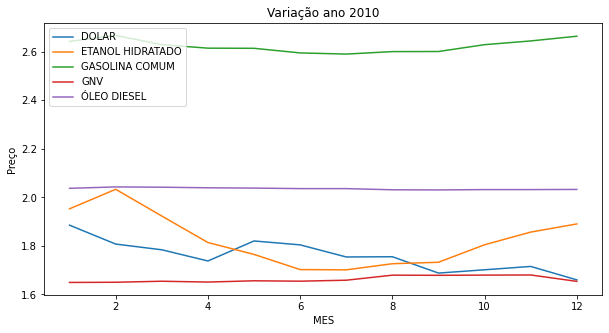

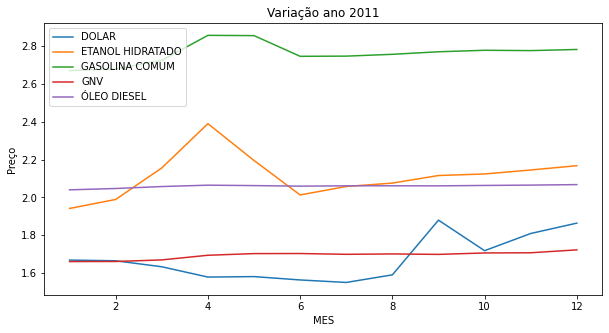

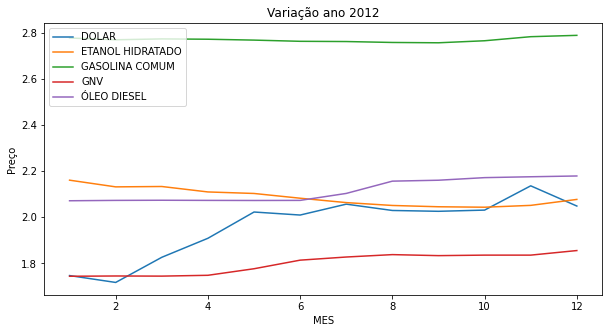

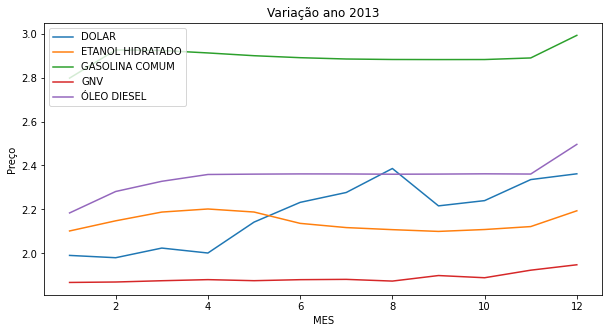

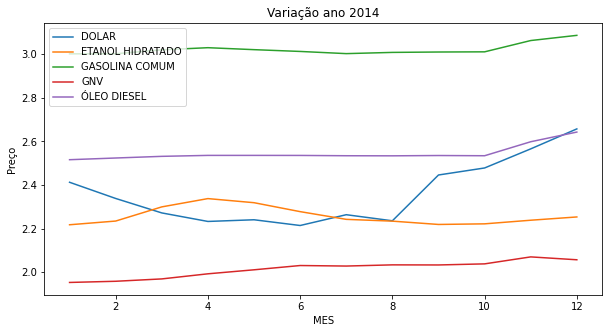

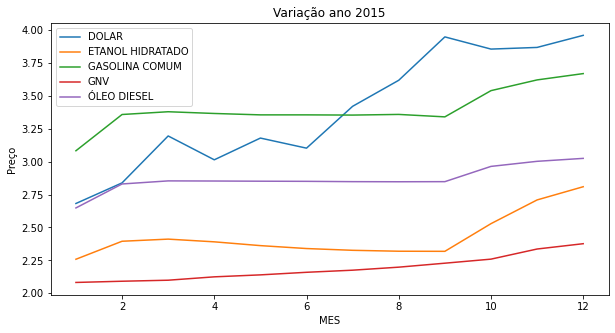

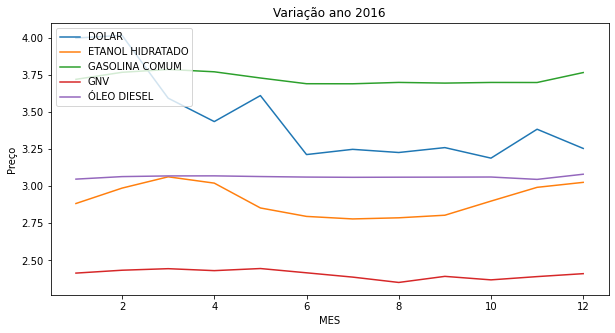

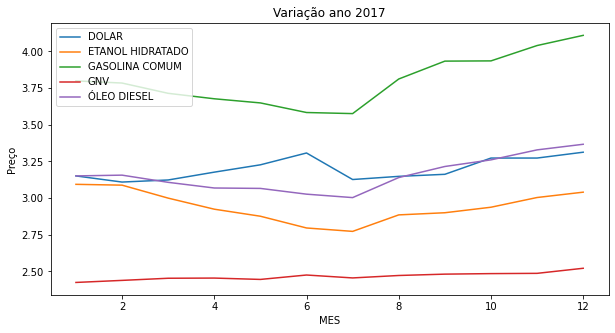

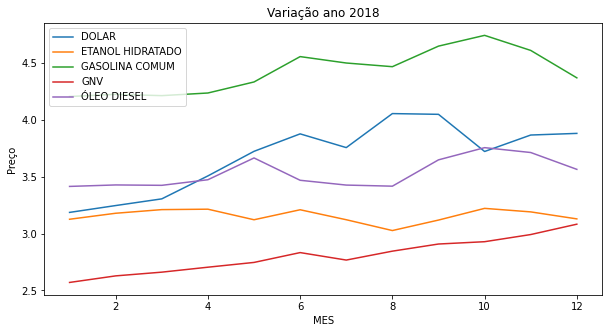

In [128]:
import matplotlib.pyplot as plt

for i  in range(2010, 2019):
  fig= plt.figure(figsize=(10,5))
  dfg=df[df["ANO"] == i]
  dfg.groupby('PRODUTO')['PRECO MÉDIO REVENDA'].plot(legend=True)
  plt.legend(loc='upper left')
  plt.ylabel("Preço")
  plt.title("Variação ano {}".format(i))
  plt.show()